In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
s3_csv_path = f's3://climatechangesdata/climatedata/GlobalLandTemperaturesByCity.csv' 
cities = pd.read_csv(s3_csv_path)

In [5]:
cities.shape

(8599212, 7)

In [6]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [7]:
cities.describe

<bound method NDFrame.describe of                  dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
1        1743-12-01                 NaN                            NaN   
2        1744-01-01                 NaN                            NaN   
3        1744-02-01                 NaN                            NaN   
4        1744-03-01                 NaN                            NaN   
...             ...                 ...                            ...   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
0         Århus      Denmar

In [8]:
cities.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

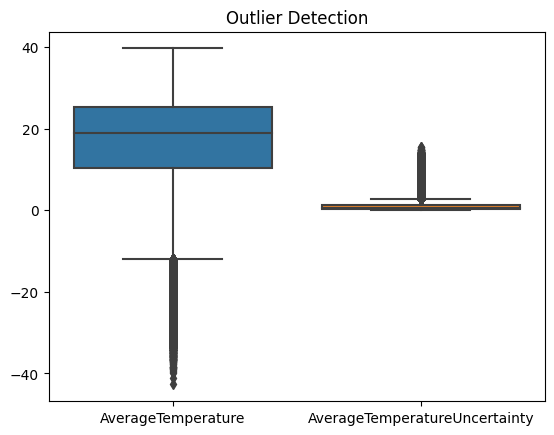

In [9]:
sns.boxplot(data=cities)
plt.title("Outlier Detection")
plt.show()

In [10]:
cities['AverageTemperature'].fillna(cities['AverageTemperature'].mean(), inplace=True)
cities['AverageTemperatureUncertainty'].fillna(cities['AverageTemperatureUncertainty'].mean(), inplace=True)

In [11]:
cities.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [12]:
duplicate = cities[cities.duplicated()]
print("Duplicate rows:", len(duplicate))
print(duplicate)

Duplicate rows: 0
Empty DataFrame
Columns: [dt, AverageTemperature, AverageTemperatureUncertainty, City, Country, Latitude, Longitude]
Index: []


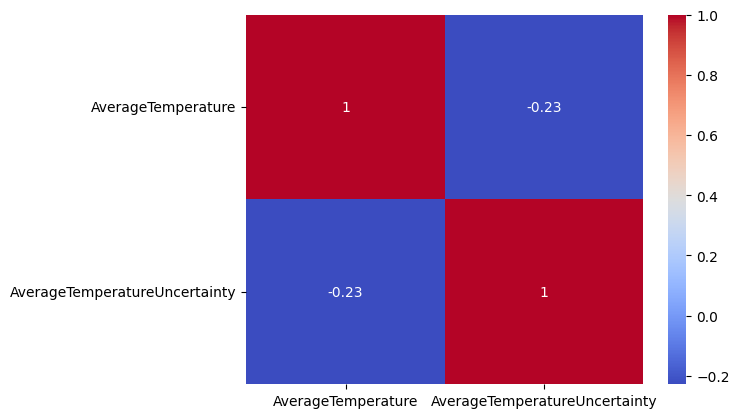

In [13]:
corr = cities.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [14]:
cities.corr()['AverageTemperature']

AverageTemperature               1.000000
AverageTemperatureUncertainty   -0.228159
Name: AverageTemperature, dtype: float64

array([[<Axes: title={'center': 'AverageTemperature'}>,
        <Axes: title={'center': 'AverageTemperatureUncertainty'}>]],
      dtype=object)

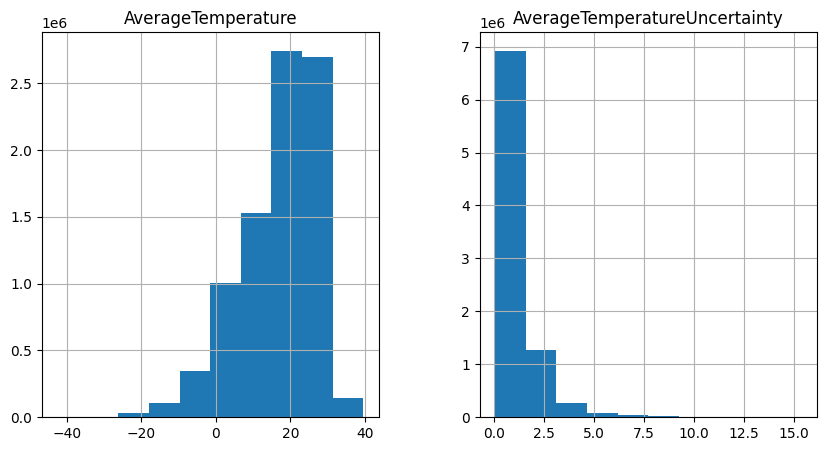

In [15]:
cities.hist(figsize=(10,5))

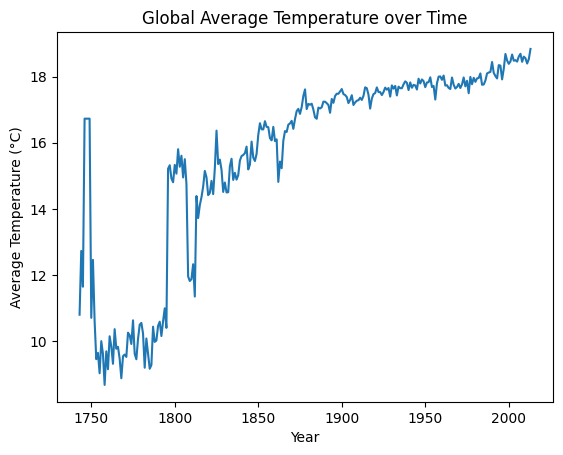

In [16]:
cities['dt'] = pd.to_datetime(cities['dt'])

# Group data by year and calculate average temperature
yearly_temps = cities.groupby(cities['dt'].dt.year)['AverageTemperature'].mean()

# Create a line plot of average temperature over time
plt.plot(yearly_temps.index, yearly_temps.values)
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Global Average Temperature over Time')
plt.show()

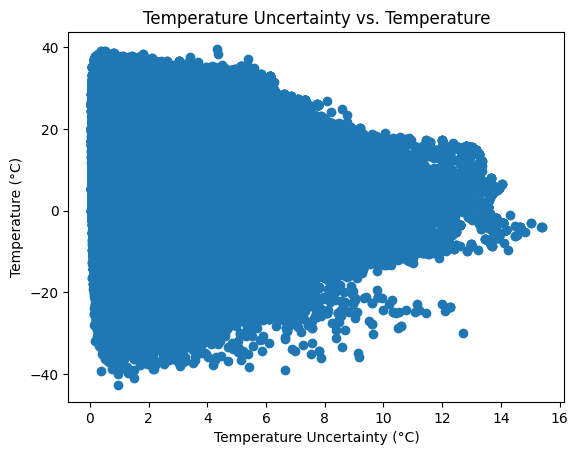

In [17]:
plt.scatter(cities['AverageTemperatureUncertainty'], cities['AverageTemperature'])
plt.xlabel('Temperature Uncertainty (°C)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Uncertainty vs. Temperature')
plt.show()

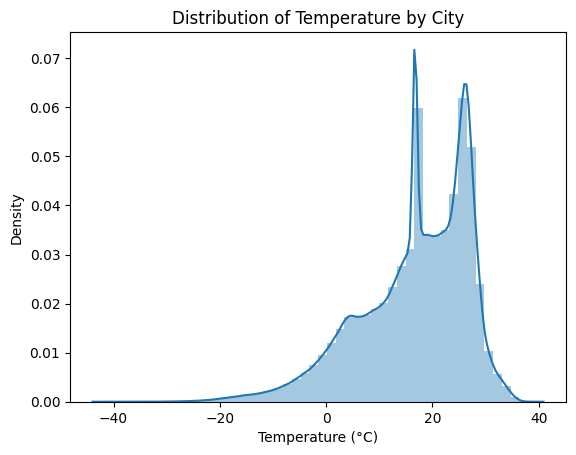

In [18]:
sns.distplot(cities['AverageTemperature'])
plt.xlabel('Temperature (°C)')
plt.title('Distribution of Temperature by City')
plt.show()


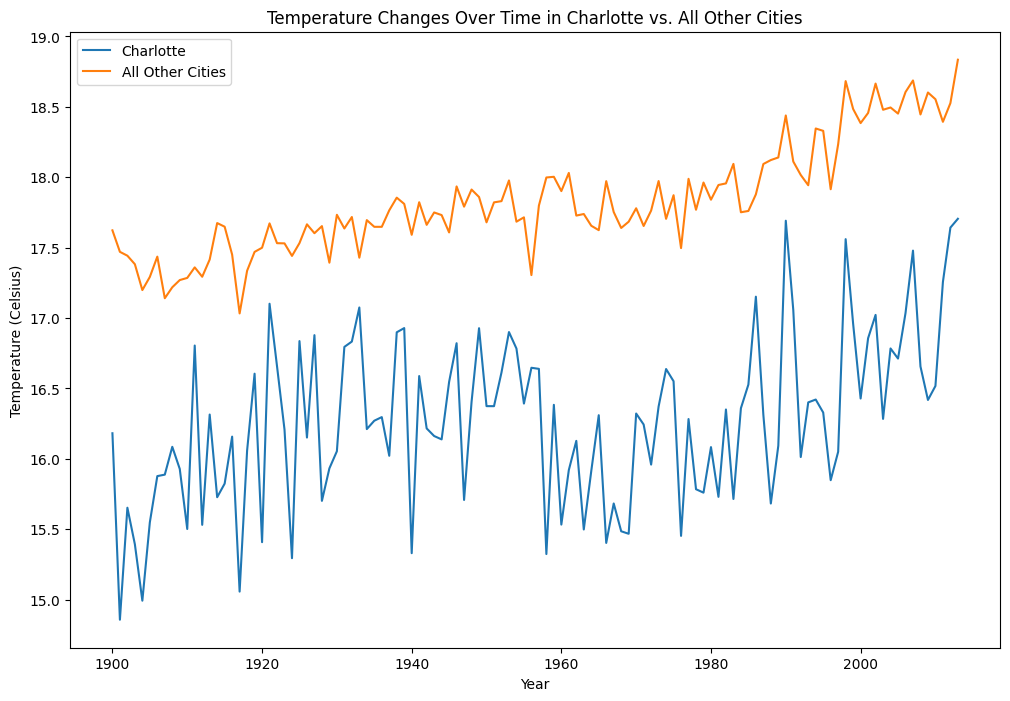

In [30]:
clt['dt'] = clt['dt'].astype(str)
other_cities['dt'] = other_cities['dt'].astype(str)

clt = clt[clt['dt'].str.startswith('19') | clt['dt'].str.startswith('20')].copy()
other_cities = other_cities[other_cities['dt'].str.startswith('19') | other_cities['dt'].str.startswith('20')].copy()

# Convert the date column to a datetime object
clt['dt'] = pd.to_datetime(clt['dt'])
other_cities['dt'] = pd.to_datetime(other_cities['dt'])

# Group the data by year and calculate the mean temperature for each year
clt_yearly_temp = clt.groupby(clt['dt'].dt.year)['AverageTemperature'].mean()
other_cities_yearly_temp = other_cities.groupby(other_cities['dt'].dt.year)['AverageTemperature'].mean()

# Create a line chart to compare the temperature changes over time in Charlotte and all other cities
plt.figure(figsize=(12,8))
sns.lineplot(x=clt_yearly_temp.index, y=clt_yearly_temp.values, label='Charlotte')
sns.lineplot(x=other_cities_yearly_temp.index, y=other_cities_yearly_temp.values, label='All Other Cities')
plt.title('Temperature Changes Over Time in Charlotte vs. All Other Cities')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()

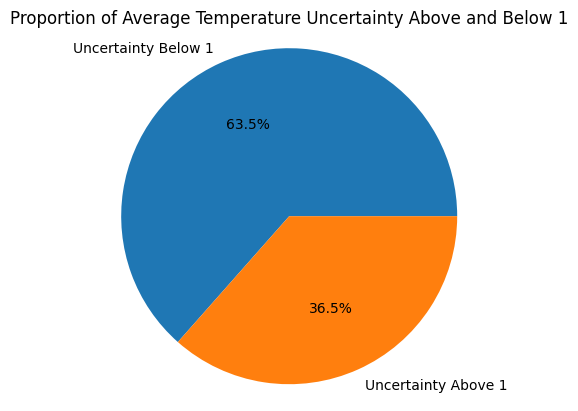

In [31]:
# Create a new column indicating whether the average temperature uncertainty is above or below 1
cities['UncertaintyAbove1'] = cities['AverageTemperatureUncertainty'] > 1

# Count the number of rows where the average temperature uncertainty is above and below 1
uncertainty_counts = cities['UncertaintyAbove1'].value_counts()

# Create a pie chart showing the proportion of average temperature uncertainty values above and below 1
plt.pie(uncertainty_counts, labels=['Uncertainty Below 1', 'Uncertainty Above 1'], autopct='%1.1f%%')
plt.title('Proportion of Average Temperature Uncertainty Above and Below 1')
plt.axis('equal')
plt.show()